# Ratemap similarity analysis
Comparison between the three ratemap similarity measures:
- OT distance
- Ratemap correlation
- Ratemap peak distance

Similarities are computed with ratemap_similarities.py

In [1]:
# imports
%pylab inline
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.manifold import MDS

Populating the interactive namespace from numpy and matplotlib


In [2]:
# PARAMETERS
animal = 3
session = '1Square'

In [3]:
# LOAD DATA
D_ot = np.load(f'processed_data/ot_distances_animal{animal}_{session}.npy')
D_peak = np.load(f'processed_data/peak_distances_animal{animal}_{session}.npy')
D_corr = np.load(f'processed_data/ratemap_correlations_animal{animal}_{session}.npy')

## Measure distribution and correlations

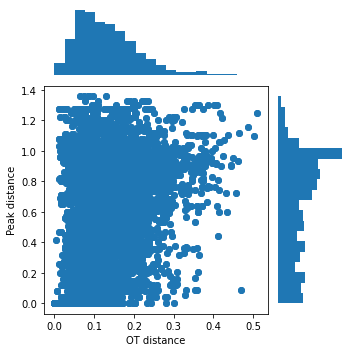

In [7]:
# OT vs peak distance
n_bins = 20

x = D_ot.flatten()
y = D_peak.flatten()

# eliminate possible nans
bad = ~np.logical_or.reduce((np.isnan(x), np.isnan(y),np.isinf(x),np.isinf(y)))
x = np.compress(bad, x)  
y = np.compress(bad, y) 


fig = figure(figsize = (5,5))
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(x,y)
ax_scatter.set_xlabel("OT distance")
ax_scatter.set_ylabel("Peak distance")
ax_hist_x.hist(x,bins = n_bins);
ax_hist_x.set_axis_off()
ax_hist_y.hist(y,bins = n_bins, orientation = 'horizontal');
ax_hist_y.set_axis_off()

tight_layout()

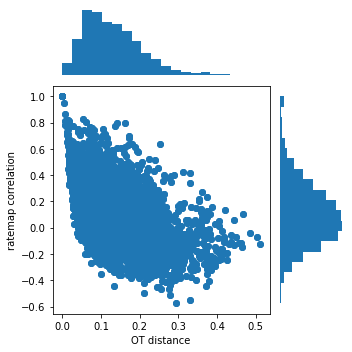

In [13]:
# OT vs correlation
n_bins = 20

x = D_ot.flatten()
y = D_corr.flatten()

# eliminate possible nans
bad = ~np.logical_or.reduce((np.isnan(x), np.isnan(y),np.isinf(x),np.isinf(y)))
x = np.compress(bad, x)  
y = np.compress(bad, y) 


fig = figure(figsize = (5,5))
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(x,y)
ax_scatter.set_xlabel("OT distance")
ax_scatter.set_ylabel("ratemap correlation")
ax_hist_x.hist(x,bins = n_bins);
ax_hist_x.set_axis_off()
ax_hist_y.hist(y,bins = n_bins, orientation = 'horizontal');
ax_hist_y.set_axis_off()

tight_layout()

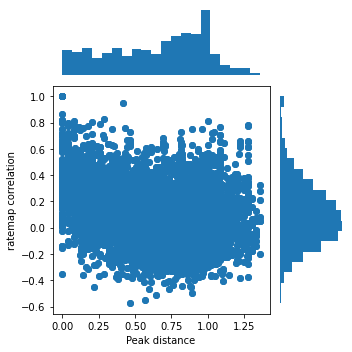

In [14]:
# peak distance vs correlation
n_bins = 20

x = D_peak.flatten()
y = D_corr.flatten()

# eliminate possible nans
bad = ~np.logical_or.reduce((np.isnan(x), np.isnan(y),np.isinf(x),np.isinf(y)))
x = np.compress(bad, x)  
y = np.compress(bad, y) 


fig = figure(figsize = (5,5))
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(x,y)
ax_scatter.set_xlabel("Peak distance")
ax_scatter.set_ylabel("ratemap correlation")
ax_hist_x.hist(x,bins = n_bins);
ax_hist_x.set_axis_off()
ax_hist_y.hist(y,bins = n_bins, orientation = 'horizontal');
ax_hist_y.set_axis_off()

tight_layout()

In [19]:
# 3d plotly scatterplot
x = D_ot.flatten()
y = D_peak.flatten()
z = D_corr.flatten()
#color = [len(r) for r in ripple_periods]
size = np.full(len(x),10)
data = pd.DataFrame({'OT distance':x,'Peak distance':y,'Ratemap correlation':z,'size':size})
fig = px.scatter_3d(data, x='OT distance', y='Peak distance', z='Ratemap correlation',size='size',size_max=10)
fig.show()


## MDS scaling for the three measures

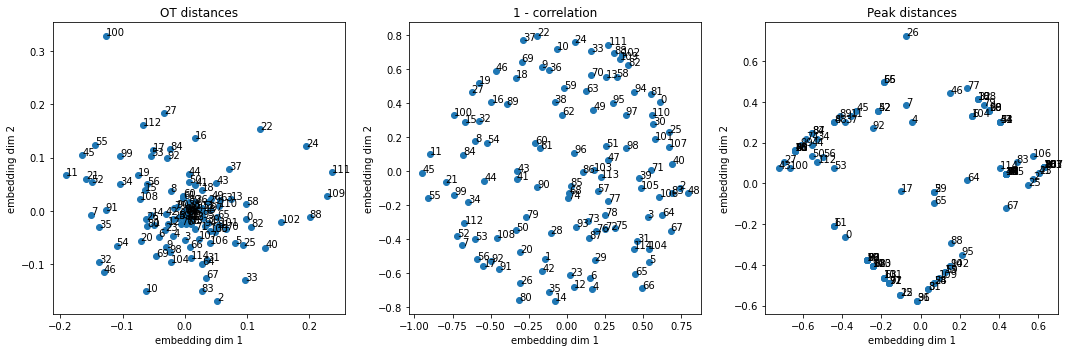

In [27]:
names = arange(D_corr.shape[0])
figure(figsize=(15,5))

subplot(1,3,1)
title('OT distances')
xlabel('embedding dim 1')
ylabel('embedding dim 2')
embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
X_mds = embedding.fit_transform(D_ot)
scatter(X_mds[:,0],X_mds[:,1])
for i in range(len(names)):
    annotate(f'{i}',(X_mds[i,0],X_mds[i,1]))


subplot(1,3,2)
title('1 - correlation')
xlabel('embedding dim 1')
ylabel('embedding dim 2')
embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
X_mds = embedding.fit_transform(1- D_corr)
scatter(X_mds[:,0],X_mds[:,1])
for i in range(len(names)):
    annotate(f'{i}',(X_mds[i,0],X_mds[i,1]))


subplot(1,3,3)
title('Peak distances')
xlabel('embedding dim 1')
ylabel('embedding dim 2')
embedding = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
X_mds = embedding.fit_transform(D_peak)
scatter(X_mds[:,0],X_mds[:,1])
for i in range(len(names)):
    annotate(f'{i}',(X_mds[i,0],X_mds[i,1]))

tight_layout()
